# Data Quality Validation Report

## Outlier Detection (IQR method)
- **person_age**: 0.00% outliers outside [12.50, 40.50]. No major outliers.
- **person_income**: 0.00% outliers outside [-22392.00, 140496.00]. No major outliers.
- **person_emp_length**: 0.00% outliers outside [-5.50, 14.50]. No major outliers.
- **loan_amnt**: 0.00% outliers outside [-5875.00, 23125.00]. No major outliers.

## Distributional Skewness
- **person_income**: skewness=0.87. No transform required.
- **loan_amnt**: skewness=0.81. No transform required.

## Class Imbalance
- Class 0: 78.13%
- Class 1: 21.87%
Suggestion: Use stratified sampling or class weights in model training.

## Target Definition Validation
- **loan_status** unique values: [np.int64(0), np.int64(1)], counts: {0: 17649, 1: 4941}
- Confirm that 0 = paid, 1 = default/delinquency; map any extra values appropriately.
- **loan_int_rate** summary: {'count': 22590.0, 'mean': 11.01456883576804, 'std': 3.078270930459095, 'min': 5.42, '25%': 8.49, 

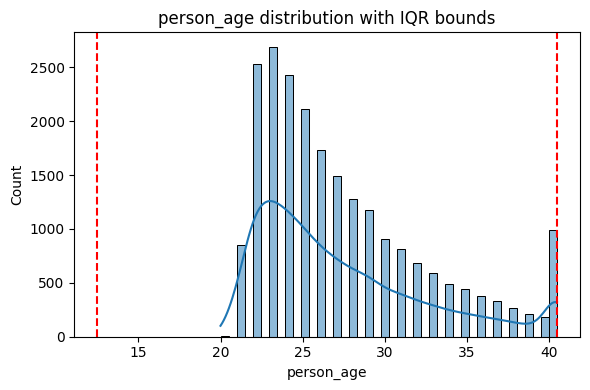

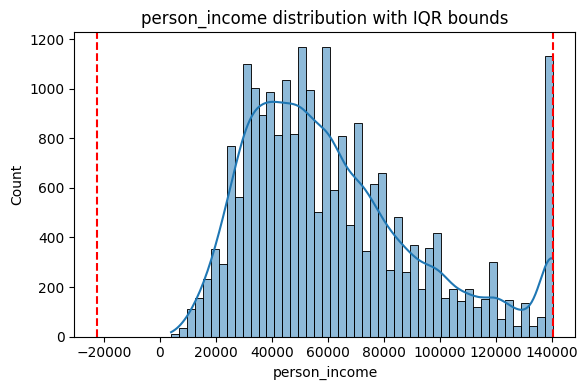

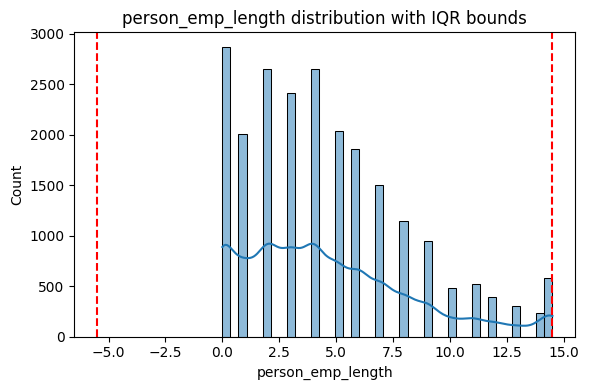

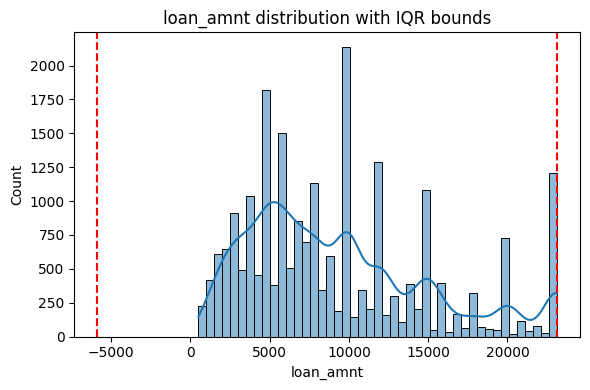

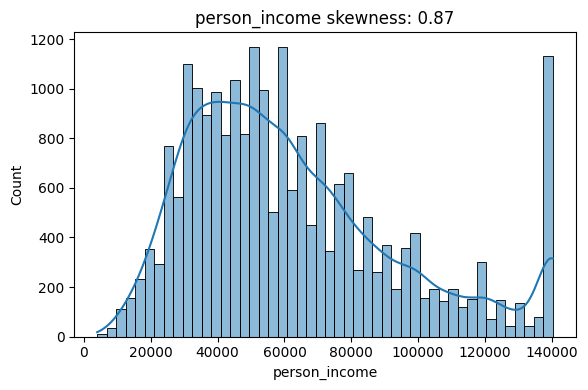

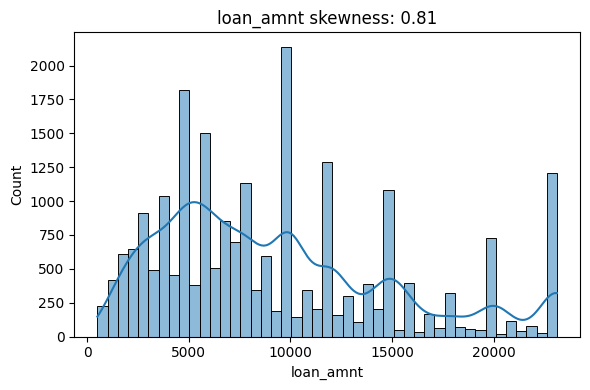

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
DATA_PATH = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\train-validate-split\train.csv"

def load_data(path):
    return pd.read_csv(path)

def detect_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    pct = ((df[col] < lower) | (df[col] > upper)).mean() * 100
    return pct, lower, upper

def check_skewness(df, col):
    skew = df[col].skew()
    if abs(skew) > 1:
        if (df[col] > 0).all():
            return skew, 'Consider log or Box-Cox transform'
        else:
            return skew, 'Consider Yeo-Johnson transform'
    return skew, 'No transform required'

def check_class_imbalance(df, target='loan_status'):
    return df[target].value_counts(normalize=True).mul(100).to_dict()

def validate_targets(df):
    unique_status = df['loan_status'].unique()
    counts_status = df['loan_status'].value_counts().to_dict()
    stats_rate = df['loan_int_rate'].describe().to_dict()
    return unique_status, counts_status, stats_rate

def data_quality_report(df):
    print('# Data Quality Validation Report\n')
    
    print('## Outlier Detection (IQR method)')
    for col in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt']:
        pct, low, high = detect_outliers(df, col)
        action = 'Review and cap or drop' if pct > 1 else 'No major outliers'
        print(f'- **{col}**: {pct:.2f}% outliers outside [{low:.2f}, {high:.2f}]. {action}.')
    print('')
    
    print('## Distributional Skewness')
    for col in ['person_income', 'loan_amnt']:
        skew, suggestion = check_skewness(df, col)
        print(f'- **{col}**: skewness={skew:.2f}. {suggestion}.')
    print('')
    
    print('## Class Imbalance')
    imbalance = check_class_imbalance(df)
    for cls, pct in imbalance.items():
        print(f'- Class {cls}: {pct:.2f}%')
    print('Suggestion: Use stratified sampling or class weights in model training.')
    print('')
    
    print('## Target Definition Validation')
    unique_status, counts_status, stats_rate = validate_targets(df)
    print(f'- **loan_status** unique values: {list(unique_status)}, counts: {counts_status}')
    print('- Confirm that 0 = paid, 1 = default/delinquency; map any extra values appropriately.')
    print(f'- **loan_int_rate** summary: {stats_rate}')
    print('- Decide whether to predict raw APR or classify into high/low bins (e.g., above/below median).')

def generate_plots(df):
    for col in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt']:
        pct, low, high = detect_outliers(df, col)
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True)
        plt.axvline(low, color='red', linestyle='--')
        plt.axvline(high, color='red', linestyle='--')
        plt.title(f'{col} distribution with IQR bounds')
        plt.tight_layout()
        plt.show()
        plt.close()

    for col in ['person_income', 'loan_amnt']:
        skew = df[col].skew()
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} skewness: {skew:.2f}')
        plt.tight_layout()
        plt.show()
        plt.close()

# --- Main Execution ---
df = load_data(DATA_PATH)
data_quality_report(df)
generate_plots(df)

📊 Dataset Shape: 22590 rows, 12 columns

📋 General Data Structure:
                    Column   Dtype  Non-Null Count  Missing %  Unique Values                                              Sample Values        Type
                person_age float64           22590        0.0             22                                           22.0, 34.0, 28.0   Numerical
             person_income   int64           22590        0.0           3080                                        29000, 38000, 38000   Numerical
     person_home_ownership  object           22590        0.0              4                                        MORTGAGE, RENT, OWN Categorical
         person_emp_length float64           22590        0.0             16                                             7.0, 10.0, 7.0   Numerical
               loan_intent  object           22590        0.0              6                              EDUCATION, MEDICAL, EDUCATION Categorical
                loan_grade  object           

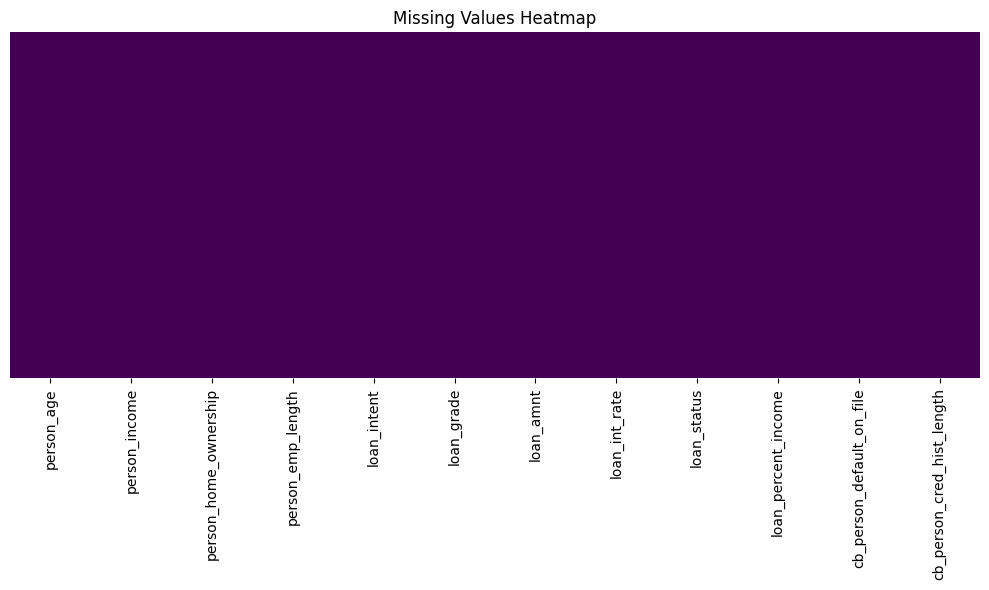

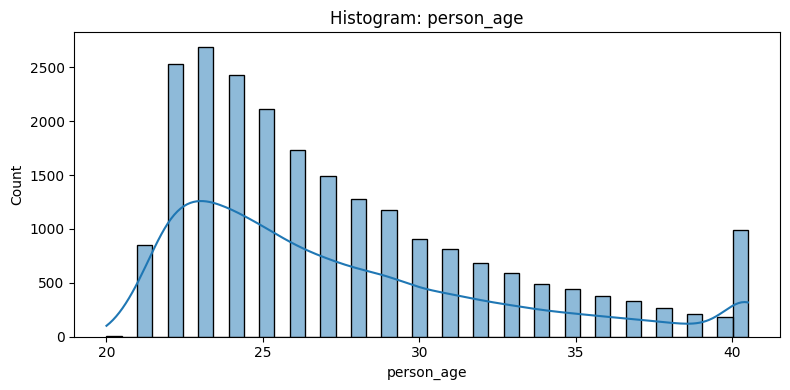

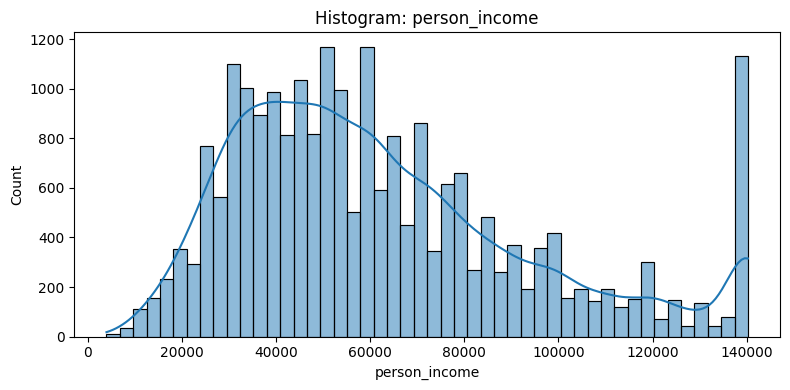

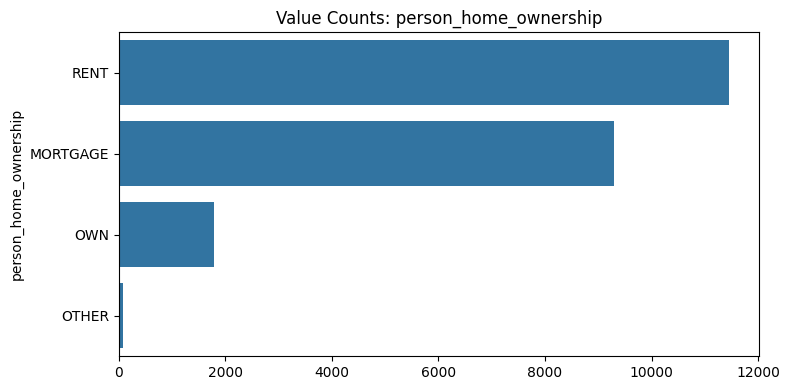

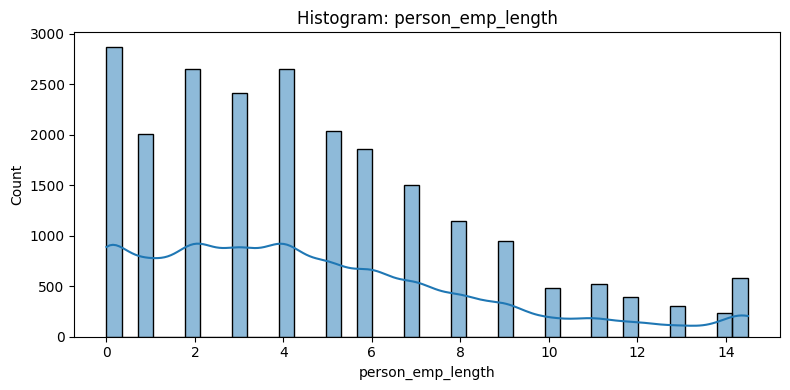

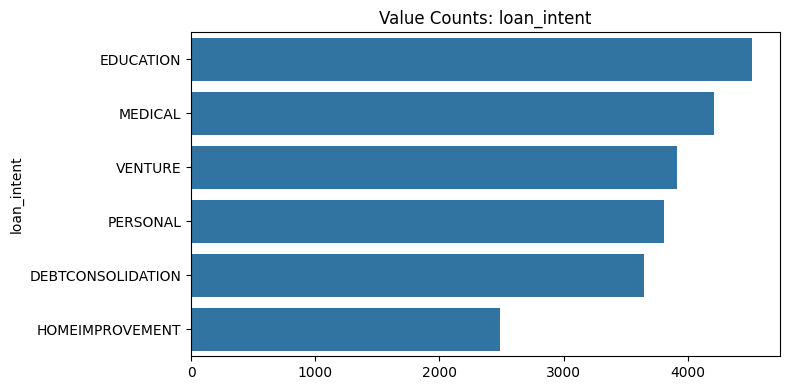

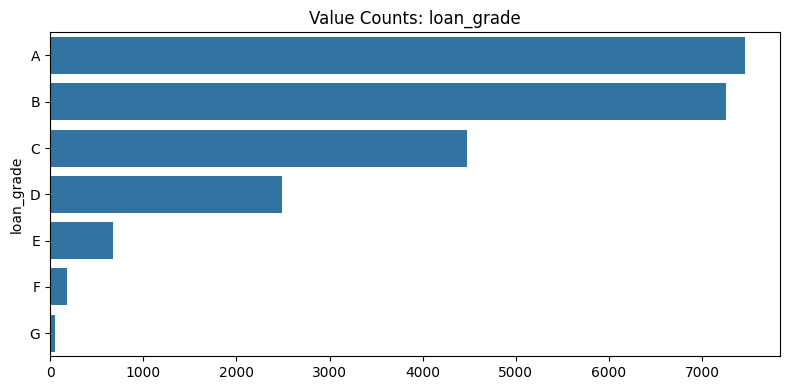

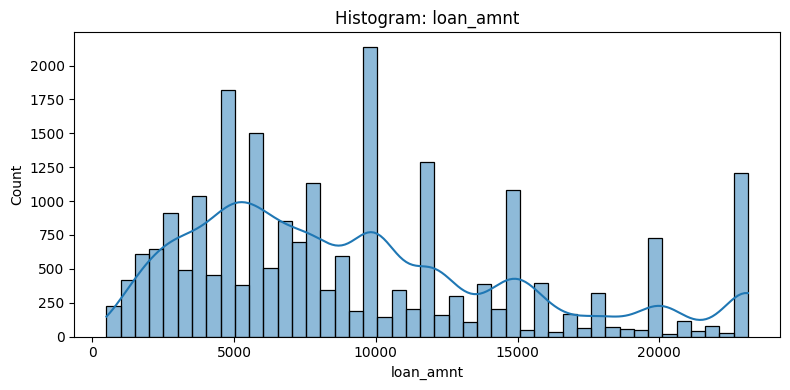

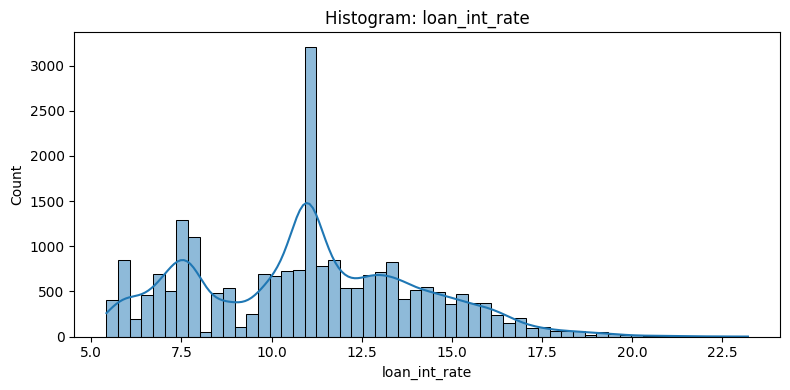

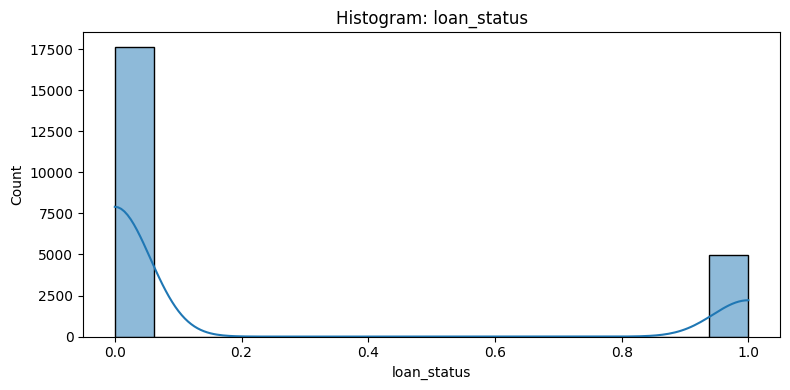

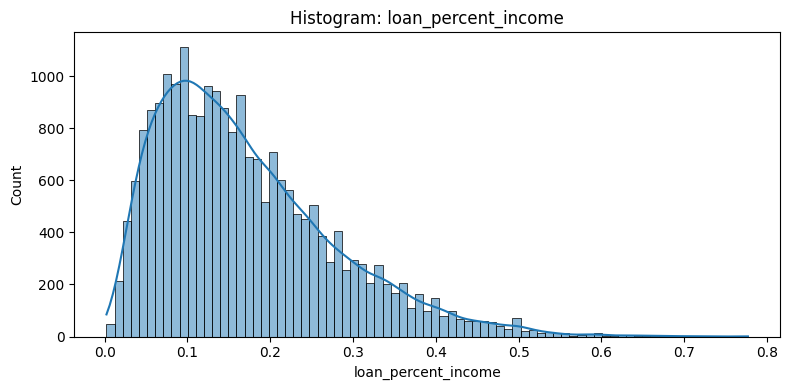

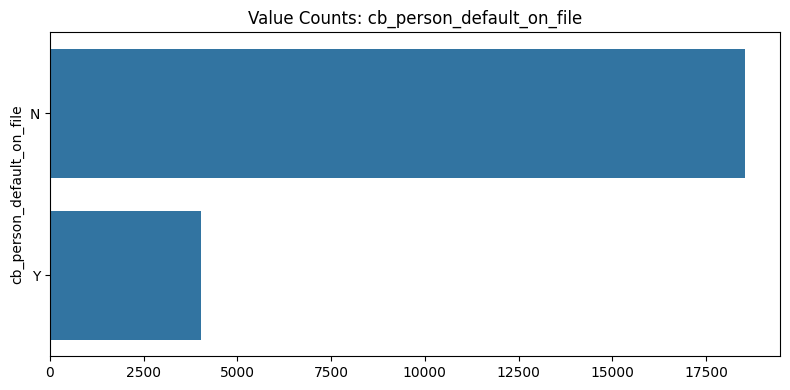

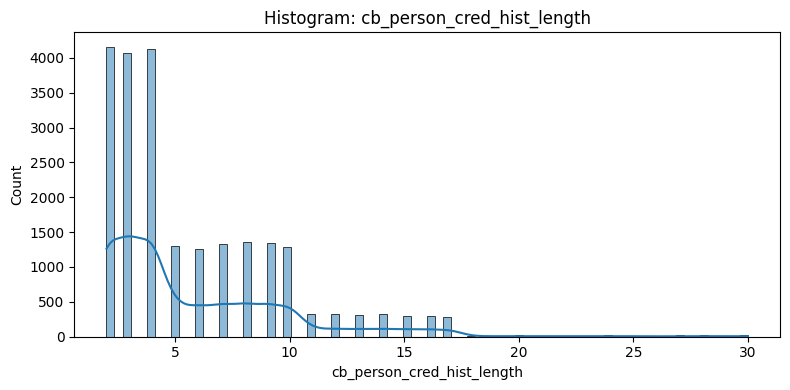

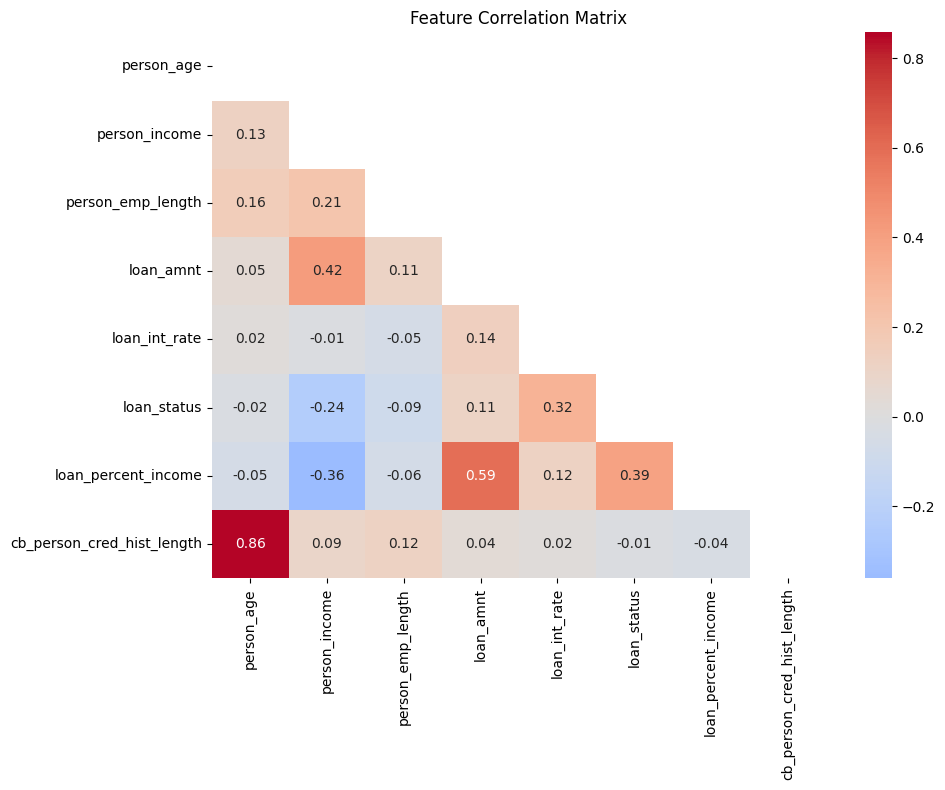

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to dataset
DATA_PATH = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\train-validate-split\train.csv"

# Load dataset
def load_data(path):
    return pd.read_csv(path)

# General data info
def get_data_structure(df):
    print("📊 Dataset Shape: {} rows, {} columns\n".format(*df.shape))
    
    # Basic column info
    info_df = pd.DataFrame({
        'Dtype': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Missing %': (1 - df.notnull().mean()) * 100,
        'Unique Values': df.nunique()
    }).reset_index()
    info_df.columns = ['Column', 'Dtype', 'Non-Null Count', 'Missing %', 'Unique Values']
    
    # Add sample values
    info_df['Sample Values'] = [
        ', '.join(map(str, df[col].dropna().sample(min(3, df[col].nunique())).tolist()))
        for col in df.columns
    ]
    
    # Add categorical vs numerical flag
    info_df['Type'] = info_df['Dtype'].apply(lambda x: 'Categorical' if str(x) == 'object' else 'Numerical')
    
    return info_df

# Numerical feature statistics
def get_numerical_stats(df):
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) == 0:
        return None
    
    stats_df = df[num_cols].describe(percentiles=[.25, .5, .75]).T
    stats_df['Range'] = stats_df['max'] - stats_df['min']
    stats_df['Skewness'] = df[num_cols].skew()
    stats_df['Kurtosis'] = df[num_cols].kurtosis()
    return stats_df

# Categorical feature analysis
def get_categorical_stats(df):
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) == 0:
        return None
    
    cat_summary = {}
    for col in cat_cols:
        top_vals = df[col].value_counts(dropna=False).head(5)
        cat_summary[col] = {
            'Top Value': top_vals.index[0],
            'Top Value Count': top_vals.iloc[0],
            'Unique Proportion': df[col].nunique() / len(df),
            'Top Values': dict(top_vals)
        }
    return cat_summary

# Missing values heatmap
def plot_missing_values(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.tight_layout()
    plt.show()

# Distribution plots
def plot_distributions(df):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Histogram: {col}")
        else:
            top_vals = df[col].value_counts(dropna=False).head(10)
            sns.barplot(x=top_vals.values, y=top_vals.index, orient='h')
            plt.title(f"Value Counts: {col}")
        plt.tight_layout()
        plt.show()
        plt.close()

# Correlation matrix (for numerical features)
def plot_correlation_matrix(df):
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) < 2:
        return
    
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
df = load_data(DATA_PATH)

# General structure report
structure_report = get_data_structure(df)
print("📋 General Data Structure:")
print(structure_report.to_string(index=False))

# Numerical statistics
num_stats = get_numerical_stats(df)
if num_stats is not None:
    print("\n🔢 Numerical Feature Statistics:")
    print(num_stats.round(2).to_string())

# Categorical statistics
cat_stats = get_categorical_stats(df)
if cat_stats:
    print("\n🔤 Categorical Feature Breakdown:")
    for col, stats in cat_stats.items():
        print(f"- {col}: Top '{stats['Top Value']}' occurs {stats['Top Value Count']} times")
        print(f"  Example values: {stats['Top Values']}")

# Visualizations
print("\n🖼️ Generating Visualizations...")
plot_missing_values(df)
plot_distributions(df)
plot_correlation_matrix(df)

📊 Dataset Shape: 22590 rows, 2 columns

📋 General Data Structure:
       Column   Dtype  Non-Null Count  Missing %  Unique Values    Sample Values      Type
  loan_status   int64           22590        0.0              2             0, 0 Numerical
loan_int_rate float64           22590        0.0            334 7.51, 7.9, 17.04 Numerical

🔢 Numerical Feature Statistics:
                 count   mean   std   min   25%    50%    75%    max  Range  Skewness  Kurtosis
loan_status    22590.0   0.22  0.41  0.00  0.00   0.00   0.00   1.00    1.0      1.36     -0.15
loan_int_rate  22590.0  11.01  3.08  5.42  8.49  10.99  13.11  23.22   17.8      0.21     -0.44

🖼️ Generating Visualizations...


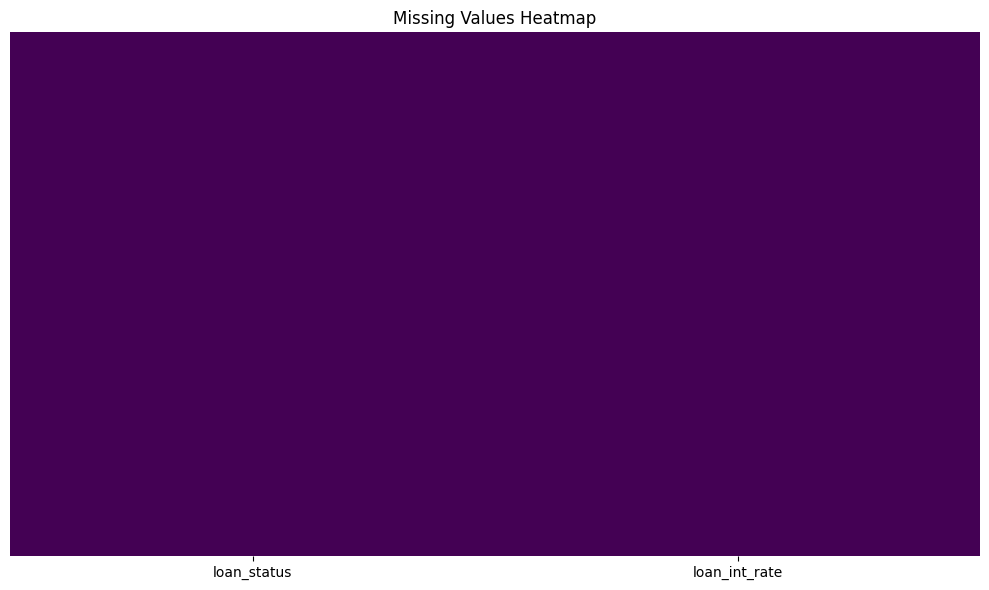

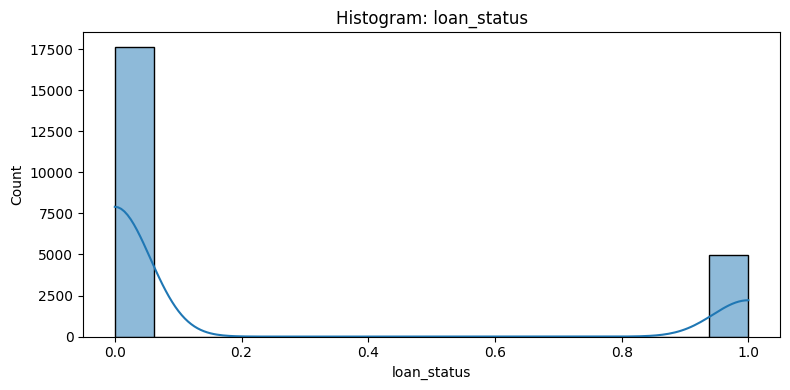

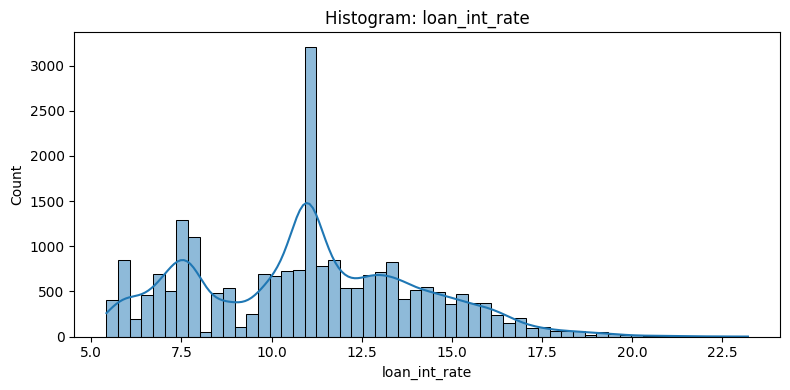

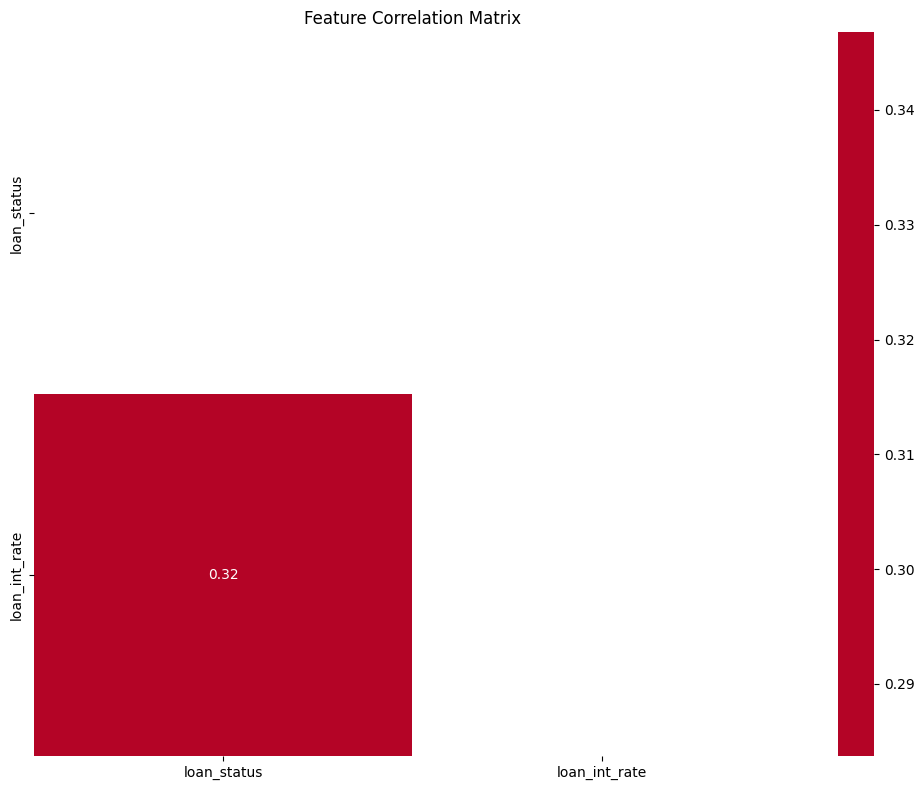

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to dataset
DATA_PATH = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\targets.csv"

# Load dataset
def load_data(path):
    return pd.read_csv(path)

# General data info
def get_data_structure(df):
    print("📊 Dataset Shape: {} rows, {} columns\n".format(*df.shape))
    
    # Basic column info
    info_df = pd.DataFrame({
        'Dtype': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Missing %': (1 - df.notnull().mean()) * 100,
        'Unique Values': df.nunique()
    }).reset_index()
    info_df.columns = ['Column', 'Dtype', 'Non-Null Count', 'Missing %', 'Unique Values']
    
    # Add sample values
    info_df['Sample Values'] = [
        ', '.join(map(str, df[col].dropna().sample(min(3, df[col].nunique())).tolist()))
        for col in df.columns
    ]
    
    # Add categorical vs numerical flag
    info_df['Type'] = info_df['Dtype'].apply(lambda x: 'Categorical' if str(x) == 'object' else 'Numerical')
    
    return info_df

# Numerical feature statistics
def get_numerical_stats(df):
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) == 0:
        return None
    
    stats_df = df[num_cols].describe(percentiles=[.25, .5, .75]).T
    stats_df['Range'] = stats_df['max'] - stats_df['min']
    stats_df['Skewness'] = df[num_cols].skew()
    stats_df['Kurtosis'] = df[num_cols].kurtosis()
    return stats_df

# Categorical feature analysis
def get_categorical_stats(df):
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) == 0:
        return None
    
    cat_summary = {}
    for col in cat_cols:
        top_vals = df[col].value_counts(dropna=False).head(5)
        cat_summary[col] = {
            'Top Value': top_vals.index[0],
            'Top Value Count': top_vals.iloc[0],
            'Unique Proportion': df[col].nunique() / len(df),
            'Top Values': dict(top_vals)
        }
    return cat_summary

# Missing values heatmap
def plot_missing_values(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.tight_layout()
    plt.show()

# Distribution plots
def plot_distributions(df):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f"Histogram: {col}")
        else:
            top_vals = df[col].value_counts(dropna=False).head(10)
            sns.barplot(x=top_vals.values, y=top_vals.index, orient='h')
            plt.title(f"Value Counts: {col}")
        plt.tight_layout()
        plt.show()
        plt.close()

# Correlation matrix (for numerical features)
def plot_correlation_matrix(df):
    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) < 2:
        return
    
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
df = load_data(DATA_PATH)

# General structure report
structure_report = get_data_structure(df)
print("📋 General Data Structure:")
print(structure_report.to_string(index=False))

# Numerical statistics
num_stats = get_numerical_stats(df)
if num_stats is not None:
    print("\n🔢 Numerical Feature Statistics:")
    print(num_stats.round(2).to_string())

# Categorical statistics
cat_stats = get_categorical_stats(df)
if cat_stats:
    print("\n🔤 Categorical Feature Breakdown:")
    for col, stats in cat_stats.items():
        print(f"- {col}: Top '{stats['Top Value']}' occurs {stats['Top Value Count']} times")
        print(f"  Example values: {stats['Top Values']}")

# Visualizations
print("\n🖼️ Generating Visualizations...")
plot_missing_values(df)
plot_distributions(df)
plot_correlation_matrix(df)

In [7]:
import os
import sys
import argparse
import pandas as pd
from typing import List, Dict, Any


def load_dataset(file_path: str) -> pd.DataFrame:
    """
    Loads a CSV file into a pandas DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        sys.exit(1)


def get_column_info(df: pd.DataFrame) -> List[Dict[str, Any]]:
    """
    Extracts column-level information: name, dtype, missing values, unique values.
    """
    info = []
    for col in df.columns:
        col_data = df[col]
        info.append({
            'column': col,
            'dtype': str(col_data.dtype),
            'missing_values': int(col_data.isna().sum()),
            'unique_values': int(col_data.nunique(dropna=True))
        })
    return info


def get_basic_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns basic statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns.
    """
    return df.describe(include='number').transpose()


def detect_feature_types(df: pd.DataFrame, cardinality_threshold: int = 20) -> List[Dict[str, Any]]:
    """
    Detects feature types and cardinality.
    Categorical if dtype == object or unique values below threshold.
    Otherwise numerical.
    """
    features = []
    for col in df.columns:
        col_data = df[col]
        unique_count = int(col_data.nunique(dropna=True))
        if col_data.dtype == 'object' or unique_count <= cardinality_threshold:
            ftype = 'categorical'
        else:
            ftype = 'numerical'
        features.append({
            'column': col,
            'feature_type': ftype,
            'cardinality': unique_count
        })
    return features


def write_report(report_path: str,
                 datasets: Dict[str, pd.DataFrame]) -> None:
    """
    Generates a textual report for each dataset and writes to a .txt file.
    """
    with open(report_path, 'w', encoding='utf-8') as f:
        for name, df in datasets.items():
            f.write(f"Dataset: {name}\n")
            f.write("=" * (9 + len(name)) + "\n\n")

            # Column info
            f.write("1. Column Info:\n")
            col_info = get_column_info(df)
            for col in col_info:
                f.write(f"   - {col['column']}: dtype={col['dtype']}, missing={col['missing_values']}, unique={col['unique_values']}\n")
            f.write("\n")

            # Basic statistics
            f.write("2. Basic Statistics (numerical columns):\n")
            stats = get_basic_statistics(df)
            for idx, row in stats.iterrows():
                f.write(f"   - {idx}: count={int(row['count'])}, mean={row['mean']:.4f}, std={row['std']:.4f}, min={row['min']}, 25%={row['25%']}, 50%={row['50%']}, 75%={row['75%']}, max={row['max']}\n")
            f.write("\n")

            # Feature engineering insights
            f.write("3. Feature Engineering Insights:\n")
            feats = detect_feature_types(df)
            for feat in feats:
                f.write(f"   - {feat['column']}: type={feat['feature_type']}, cardinality={feat['cardinality']}\n")
            f.write("\n\n")

    print(f"Report written to: {report_path}")


def parse_args() -> argparse.Namespace:
    """
    Parses command-line arguments.
    """
    parser = argparse.ArgumentParser(
        description="Generate a structured dataset report from one or more CSV files."
    )
    parser.add_argument(
        'csv_files',
        nargs='+',
        help='Paths to input CSV file(s)'
    )
    return parser.parse_args()


def main():
    args = parse_args()
    datasets = {}

    for file_path in args.csv_files:
        name = os.path.basename(file_path)
        datasets[name] = load_dataset(file_path)

    # Determine report path: same directory as this script
    script_dir = os.path.dirname(os.path.abspath(__file__))
    report_path = os.path.join(script_dir, 'dataset_report.txt')

    write_report(report_path, datasets)


if __name__ == '__main__':
    main()


Error loading --f="c:\Users\Ken Ira Talingting\AppData\Roaming\jupyter\runtime\kernel-v3a7dcf6f9361cbbd6a4eca9ccc327a88a950102b8.json": [Errno 22] Invalid argument: '--f="c:\\Users\\Ken Ira Talingting\\AppData\\Roaming\\jupyter\\runtime\\kernel-v3a7dcf6f9361cbbd6a4eca9ccc327a88a950102b8.json"'


SystemExit: 1

In [10]:
import pandas as pd
import numpy as np
import os
import logging
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, skew
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

class DataQualityChecker:
    def __init__(self, features_path, targets_path, output_dir="data_quality_reports"):
        self.features_path = features_path
        self.targets_path = targets_path
        self.output_dir = output_dir
        self._setup_directories()
        
    def _setup_directories(self):
        os.makedirs(self.output_dir, exist_ok=True)
        self.plot_dir = os.path.join(self.output_dir, "plots")
        os.makedirs(self.plot_dir, exist_ok=True)
        
    def load_data(self):
        try:
            self.X = pd.read_csv(self.features_path)
            self.y = pd.read_csv(self.targets_path)
            logger.info("✅ Data loaded successfully")
            return True
        except Exception as e:
            logger.error(f"❌ Data loading failed: {str(e)}")
            return False
            
    def check_missing_values(self):
        missing = self.X.isnull().sum()
        if missing.sum() > 0:
            logger.warning("⚠️ Missing values detected:")
            logger.warning(missing[missing > 0])
            return False
        logger.info("✅ No missing values detected")
        return True
        
    def check_data_types(self):
        logger.info("📊 Feature data types:")
        for col, dtype in self.X.dtypes.items():
            logger.info(f" - {col}: {dtype}")
        return True
        
    def check_feature_stats(self):
        numeric_features = self.X.select_dtypes(include=[np.number]).columns
        logger.info(f"🔢 Numeric features: {list(numeric_features)}")
        
        # Skewness check
        skewness = self.X[numeric_features].apply(skew).sort_values(ascending=False)
        logger.info("📉 Feature skewness:")
        logger.info(skewness)
        
        # Correlation analysis
        corr_matrix = self.X[numeric_features].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
        plt.title("Feature Correlation Matrix")
        plt.savefig(os.path.join(self.plot_dir, "feature_correlations.png"))
        plt.close()
        
        # VIF for multicollinearity
        vif_data = pd.DataFrame()
        vif_data["Feature"] = numeric_features
        vif_data["VIF"] = [variance_inflation_factor(self.X[numeric_features].values, i) 
                          for i in range(len(numeric_features))]
        logger.info("🧮 Variance Inflation Factors:")
        logger.info(vif_data.sort_values("VIF", ascending=False))
        
        return True
        
    def check_target_analysis(self):
        if isinstance(self.y, pd.DataFrame):
            for col in self.y.columns:
                if len(self.y[col].unique()) <= 2:  # Binary classification target
                    logger.info(f"🎯 Target '{col}' class distribution:")
                    logger.info(self.y[col].value_counts(normalize=True))
                    
                    # Point-biserial correlation with numeric features
                    numeric_features = self.X.select_dtypes(include=[np.number]).columns
                    correlations = {}
                    for feat in numeric_features:
                        corr, pval = pointbiserialr(self.X[feat], self.y[col])
                        correlations[feat] = (corr, pval)
                    
                    corr_df = pd.DataFrame(
                        correlations, 
                        index=['correlation', 'p_value']
                    ).T.sort_values('correlation', key=abs, ascending=False)
                    logger.info(f"🔎 Top features correlated with '{col}':")
                    logger.info(corr_df.head(10))
                    
                    # Save top correlations plot
                    plt.figure(figsize=(10, 6))
                    corr_df['correlation'].head(10).plot(kind='barh')
                    plt.title(f"Top Feature Correlations with {col}")
                    plt.savefig(os.path.join(self.plot_dir, f"{col}_correlations.png"))
                    plt.close()
        return True
        
    def check_feature_importance(self):
        """Check feature importance using a baseline model"""
        try:
            # Assuming binary classification for loan_status
            target_col = 'loan_status' if 'loan_status' in self.y.columns else self.y.columns[0]
            model = RandomForestClassifier(n_estimators=50, random_state=42)
            model.fit(self.X, self.y[target_col])
            
            importance = pd.Series(model.feature_importances_, index=self.X.columns)
            importance = importance.sort_values(ascending=False)
            
            logger.info("🏆 Top 15 Important Features:")
            logger.info(importance.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            importance.head(15).plot(kind='barh')
            plt.title("Feature Importance from Random Forest")
            plt.savefig(os.path.join(self.plot_dir, "feature_importance.png"))
            plt.close()
            
        except Exception as e:
            logger.error(f"❌ Feature importance analysis failed: {str(e)}")
        return True
        
    def check_constant_features(self):
        threshold = 0.99
        constant_features = []
        
        for col in self.X.columns:
            value_counts = self.X[col].value_counts(normalize=True)
            if len(value_counts) == 1 or value_counts.iloc[0] > threshold:
                constant_features.append((col, value_counts.index[0], value_counts.iloc[0]))
                
        if constant_features:
            logger.warning("⚠️ Constant/near-constant features detected:")
            for col, val, pct in constant_features:
                logger.warning(f" - {col}: {pct:.2%} constant ({val})")
            return False
        logger.info("✅ No constant/near-constant features detected")
        return True
        
    def generate_report(self):
        logger.info("\n" + "="*50)
        logger.info("🔍 DATA QUALITY CHECK REPORT")
        logger.info("="*50 + "\n")
        
        checks = {
            "Missing Values": self.check_missing_values(),
            "Constant Features": self.check_constant_features(),
            "Data Types": self.check_data_types(),
            "Feature Statistics": self.check_feature_stats(),
            "Target Analysis": self.check_target_analysis(),
            "Feature Importance": self.check_feature_importance()
        }
        
        logger.info("\n" + "="*50)
        logger.info("📋 Summary")
        logger.info("="*50)
        for check, passed in checks.items():
            logger.info(f"{check}: {'✅' if passed else '❌'}")
            
        logger.info(f"📊 Plots saved to: {self.plot_dir}")
        logger.info("Report completed!")

if __name__ == "__main__":
    features_path = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\processed_features.csv"
    targets_path = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\targets.csv"
    
    dq_checker = DataQualityChecker(features_path, targets_path)
    
    if dq_checker.load_data():
        dq_checker.generate_report()
    else:
        logger.error("Data quality check aborted due to loading failure")

2025-05-02 22:02:12,940 - INFO - ✅ Data loaded successfully
2025-05-02 22:02:12,946 - INFO - 
2025-05-02 22:02:12,946 - INFO - 🔍 DATA QUALITY CHECK REPORT
2025-05-02 22:02:12,948 - INFO - ==================================================

2025-05-02 22:02:12,977 - INFO - ✅ No missing values detected
2025-05-02 22:02:13,055 - INFO - ✅ No constant/near-constant features detected
2025-05-02 22:02:13,057 - INFO - 📊 Feature data types:
2025-05-02 22:02:13,061 - INFO -  - person_age: float64
2025-05-02 22:02:13,062 - INFO -  - person_income_log: float64
2025-05-02 22:02:13,062 - INFO -  - loan_amnt_log: float64
2025-05-02 22:02:13,063 - INFO -  - loan_percent_income: float64
2025-05-02 22:02:13,063 - INFO -  - cb_person_cred_hist_length: float64
2025-05-02 22:02:13,064 - INFO -  - stability_score: float64
2025-05-02 22:02:13,065 - INFO -  - person_income_capped: float64
2025-05-02 22:02:13,066 - INFO -  - loan_amnt_capped: float64
2025-05-02 22:02:13,068 - INFO -  - person_home_ownership_MO

In [12]:
import pandas as pd
import numpy as np
import os
import logging
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from xgboost import plot_importance
import matplotlib.pyplot as plt
import joblib

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

class XGBoostBaseline:
    def __init__(self, features_path, targets_path, output_dir="models"):
        self.features_path = features_path
        self.targets_path = targets_path
        self.output_dir = output_dir
        self._setup_directories()
        self.model = None
        self.best_params = None
        
    def _setup_directories(self):
        os.makedirs(self.output_dir, exist_ok=True)
        self.plot_dir = os.path.join(self.output_dir, "plots")
        os.makedirs(self.plot_dir, exist_ok=True)
        
    def load_data(self):
        """Load and prepare data"""
        try:
            self.X = pd.read_csv(self.features_path)
            self.y = pd.read_csv(self.targets_path)
            
            # Handle constant features from quality check
            constant_features = [
                'person_home_ownership_OTHER', 
                'risk_group_GradeF_Default',
                'risk_group_GradeF_NoDefault',
                'risk_group_GradeG_Default',
                'risk_group_GradeG_NoDefault'
            ]
            self.X = self.X.drop(columns=[col for col in constant_features if col in self.X.columns])
            
            logger.info(f"✅ Loaded data with {self.X.shape[1]} features")
            return True
        except Exception as e:
            logger.error(f"❌ Data loading failed: {str(e)}")
            return False
            
    def prepare_data(self, test_size=0.2, random_state=42):
        """Split data into train and test sets"""
        try:
            # Ensure target column name matches your actual target (e.g., loan_status)
            target_col = 'loan_status' if 'loan_status' in self.y.columns else self.y.columns[0]
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X, self.y[target_col],
                test_size=test_size,
                random_state=random_state,
                stratify=self.y[target_col]  # Preserve class distribution
            )
            logger.info(f"📊 Data split: {len(self.X_train)} train, {len(self.X_test)} test")
            return True
        except Exception as e:
            logger.error(f"❌ Data preparation failed: {str(e)}")
            return False
            
    def train_model(self):
        """Train XGBoost model with early stopping"""
        try:
            # Convert to DMatrix for better performance
            dtrain = xgb.DMatrix(self.X_train, label=self.y_train)
            dtest = xgb.DMatrix(self.X_test, label=self.y_test)
            
            # Default parameters for baseline
            params = {
                'objective': 'binary:logistic',
                'eval_metric': 'auc',
                'tree_method': 'hist',  # Faster computation
                'device': 'cuda' if xgb.__version__ >= '2.0.0' else 'cpu',  # GPU acceleration
                'random_state': 42
            }
            
            # Cross-validation for early stopping
            cv_results = xgb.cv(
                params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=20,
                folds=StratifiedKFold(n_splits=5),
                metrics=("auc"),
                seed=42
            )
            
            best_rounds = cv_results.shape[0]
            logger.info(f"📈 Best number of boosting rounds: {best_rounds}")
            
            # Train final model
            self.model = xgb.train(
                params,
                dtrain,
                num_boost_round=best_rounds
            )
            
            # Save model
            joblib.dump(self.model, os.path.join(self.output_dir, 'xgb_baseline.model'))
            logger.info("✅ Model trained and saved")
            return True
        except Exception as e:
            logger.error(f"❌ Model training failed: {str(e)}")
            return False
            
    def evaluate_model(self):
        """Evaluate model performance"""
        try:
            # Predict probabilities
            y_pred_proba = self.model.predict(xgb.DMatrix(self.X_test))
            y_pred = (y_pred_proba > 0.5).astype(int)
            
            # Calculate metrics
            metrics = {
                'AUC': roc_auc_score(self.y_test, y_pred_proba),
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'Precision': precision_score(self.y_test, y_pred),
                'Recall': recall_score(self.y_test, y_pred),
                'F1': f1_score(self.y_test, y_pred)
            }
            
            logger.info("📊 Evaluation Metrics:")
            for metric, value in metrics.items():
                logger.info(f" - {metric}: {value:.4f}")
                
            # Confusion matrix
            cm = confusion_matrix(self.y_test, y_pred)
            plt.figure(figsize=(6, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title("Confusion Matrix")
            plt.savefig(os.path.join(self.plot_dir, "confusion_matrix.png"))
            plt.close()
            
            # Feature importance
            plt.figure(figsize=(10, 8))
            plot_importance(self.model, max_num_features=20, importance_type='gain')
            plt.title("Feature Importance (Gain)")
            plt.tight_layout()
            plt.savefig(os.path.join(self.plot_dir, "feature_importance.png"))
            plt.close()
            
            return metrics
        except Exception as e:
            logger.error(f"❌ Model evaluation failed: {str(e)}")
            return None
            
    def run_pipeline(self):
        """Run complete pipeline"""
        logger.info("\n" + "="*50)
        logger.info("🚀 RUNNING XGBOOST BASELINE PIPELINE")
        logger.info("="*50 + "\n")
        
        steps = [
            ("Data Loading", self.load_data),
            ("Data Preparation", self.prepare_data),
            ("Model Training", self.train_model),
            ("Model Evaluation", self.evaluate_model)
        ]
        
        for step_name, step_func in steps:
            logger.info(f"\n🔧 {step_name}")
            result = step_func()
            if not result:
                logger.error(f"❌ {step_name} failed")
                return False
            logger.info(f"✅ {step_name} completed")
            
        logger.info("\n" + "="*50)
        logger.info("🏁 PIPELINE COMPLETED SUCCESSFULLY")
        logger.info("="*50)
        return True

if __name__ == "__main__":
    features_path = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\processed_features.csv"
    targets_path = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\targets.csv"
    
    pipeline = XGBoostBaseline(features_path, targets_path)
    pipeline.run_pipeline()

2025-05-02 22:03:26,973 - INFO - 
2025-05-02 22:03:26,976 - INFO - 🚀 RUNNING XGBOOST BASELINE PIPELINE
2025-05-02 22:03:26,978 - INFO - ==================================================

2025-05-02 22:03:26,979 - INFO - 
🔧 Data Loading
2025-05-02 22:03:27,359 - INFO - ✅ Loaded data with 65 features
2025-05-02 22:03:27,362 - INFO - ✅ Data Loading completed
2025-05-02 22:03:27,363 - INFO - 
🔧 Data Preparation
2025-05-02 22:03:27,415 - INFO - 📊 Data split: 18072 train, 4518 test
2025-05-02 22:03:27,417 - INFO - ✅ Data Preparation completed
2025-05-02 22:03:27,419 - INFO - 
🔧 Model Training
2025-05-02 22:03:31,082 - INFO - 📈 Best number of boosting rounds: 41
2025-05-02 22:03:31,312 - INFO - ✅ Model trained and saved
2025-05-02 22:03:31,317 - INFO - ✅ Model Training completed
2025-05-02 22:03:31,320 - INFO - 
🔧 Model Evaluation
2025-05-02 22:03:31,361 - INFO - 📊 Evaluation Metrics:
2025-05-02 22:03:31,362 - INFO -  - AUC: 0.9434
2025-05-02 22:03:31,364 - INFO -  - Accuracy: 0.9374
2025-05

<Figure size 1000x800 with 0 Axes>

Data loaded successfully
Features shape: (22590, 65)
Targets shape: (22590, 2)

Features Structure Analysis:
----------------------------------------
Number of rows: 22590
Number of columns: 65

Column types distribution:
float64    65
Name: count, dtype: int64

First 2 rows:

Targets Structure Analysis:
----------------------------------------
Number of rows: 22590
Number of columns: 2

Column types distribution:
int64      1
float64    1
Name: count, dtype: int64

First 2 rows:

Features: No missing values detected

Targets: No missing values detected

Constant/Near-Constant Feature Analysis:
----------------------------------------

Numeric Features Distribution:
----------------------------------------
Found 65 numeric features

Top 10 Most Skewed Features:
risk_group_GradeE_Default             8.277
age_income_interaction_40+_low        8.015
risk_group_GradeE_NoDefault           7.742
age_income_interaction_40+_medium     7.363
age_income_interaction_40+_high       6.937
age_inco

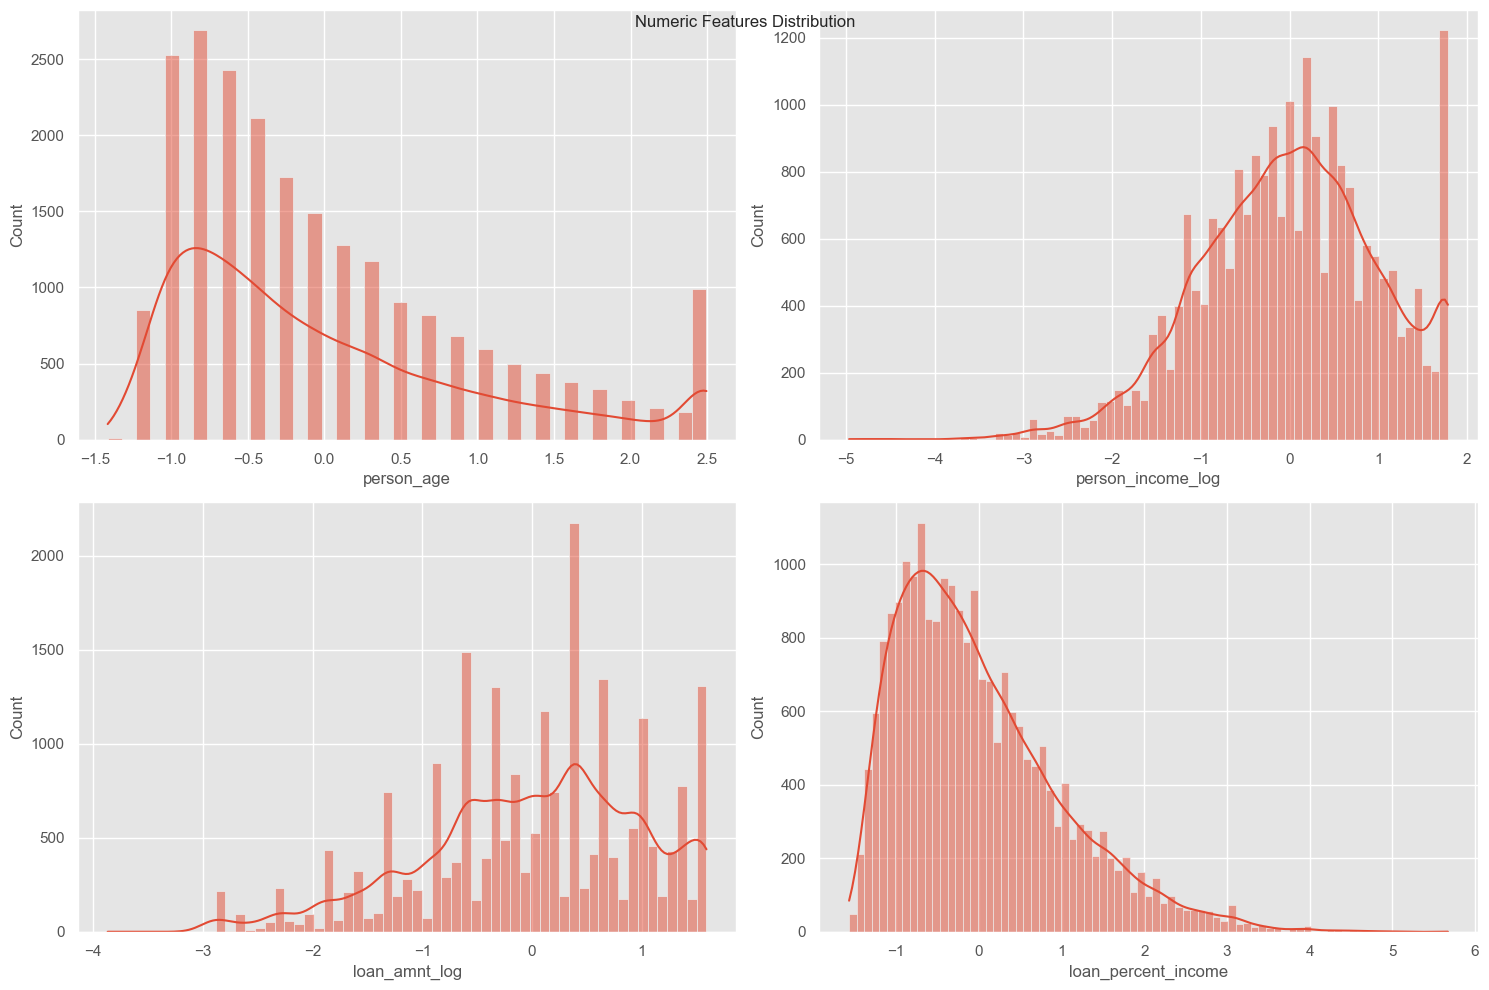


Categorical Features (0 total):
----------------------------------------

Feature Correlation Analysis:
----------------------------------------

Top 10 Feature Correlations:
                                Feature1                    Feature2  \
1                   person_income_capped           person_income_log   
2                          loan_amnt_log            loan_amnt_capped   
3                             person_age  cb_person_cred_hist_length   
4         person_home_ownership_MORTGAGE  person_home_ownership_RENT   
5                       loan_amnt_capped       loan_amnt_quartile_Q4   
6                   person_income_capped  person_income_bracket_high   
7   cb_person_cred_hist_length_group_2-5                  person_age   
8                  loan_amnt_quartile_Q1               loan_amnt_log   
9   cb_person_cred_hist_length_group_>10  cb_person_cred_hist_length   
10             person_income_bracket_low           person_income_log   

    Correlation  
1         0.9

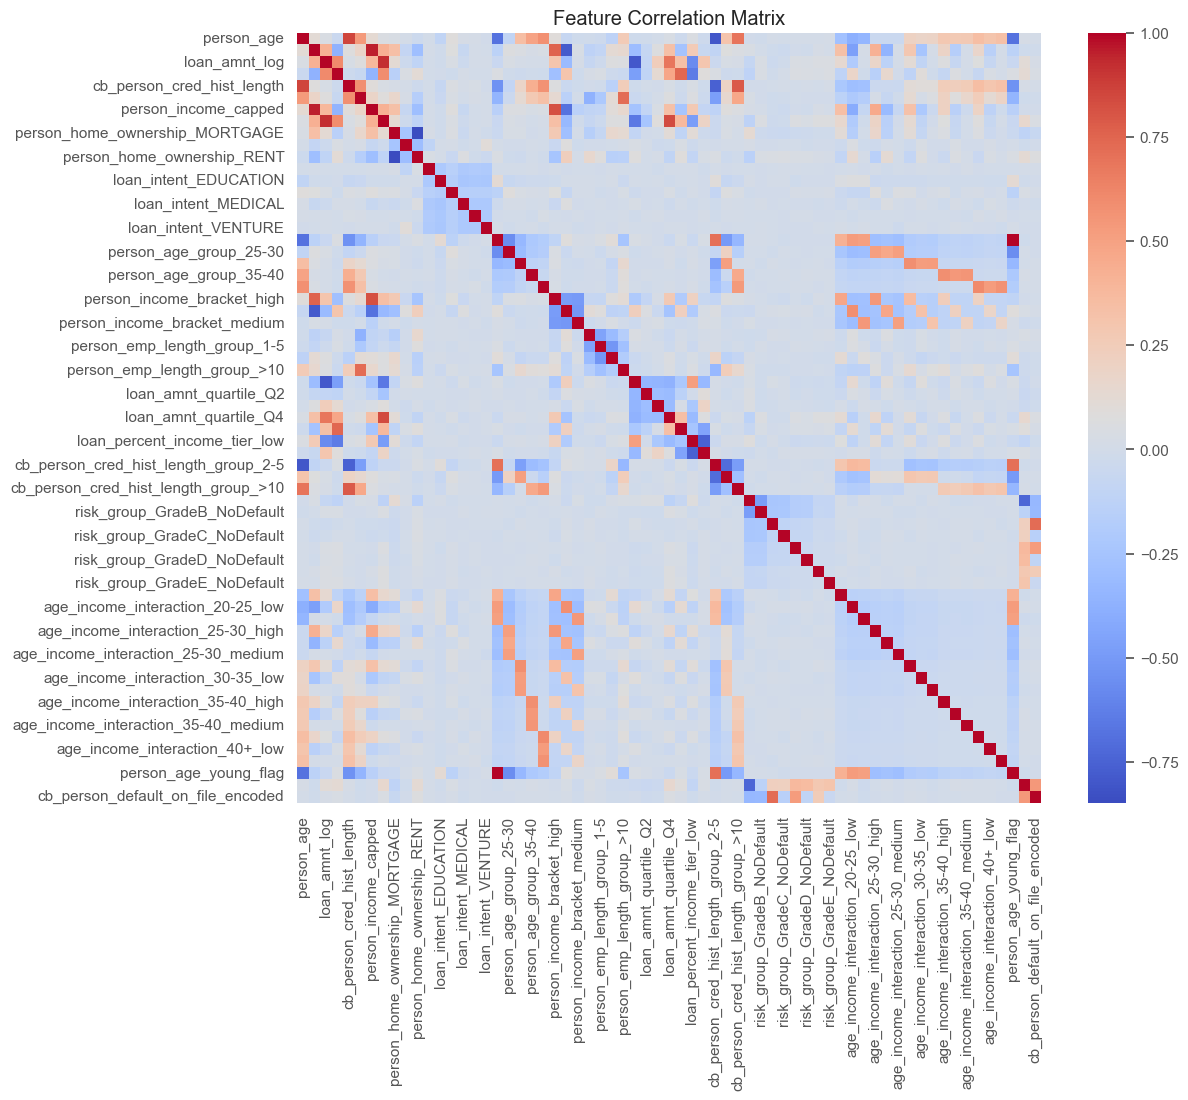


Target Analysis:
----------------------------------------
Binary classification task detected

Class distribution for loan_status:
loan_status
0   0.781
1   0.219

Top 10 Features Correlated with Target:
loan_percent_income_tier_high   0.425
loan_percent_income             0.390
loan_grade_encoded              0.370
person_income_log               0.285
person_income_capped            0.240
person_home_ownership_RENT      0.239
person_income_bracket_low       0.239
risk_group_GradeD_Default       0.223
risk_group_GradeD_NoDefault     0.206
risk_group_GradeA_NoDefault     0.204
Name: Correlation, dtype: float64


2025-05-02 22:11:39,208 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-02 22:11:39,281 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-02 22:11:39,479 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-02 22:11:39,522 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-02 22:11:39,627 - INFO - Using categorical units to plot a list of strings that are all parsable as 

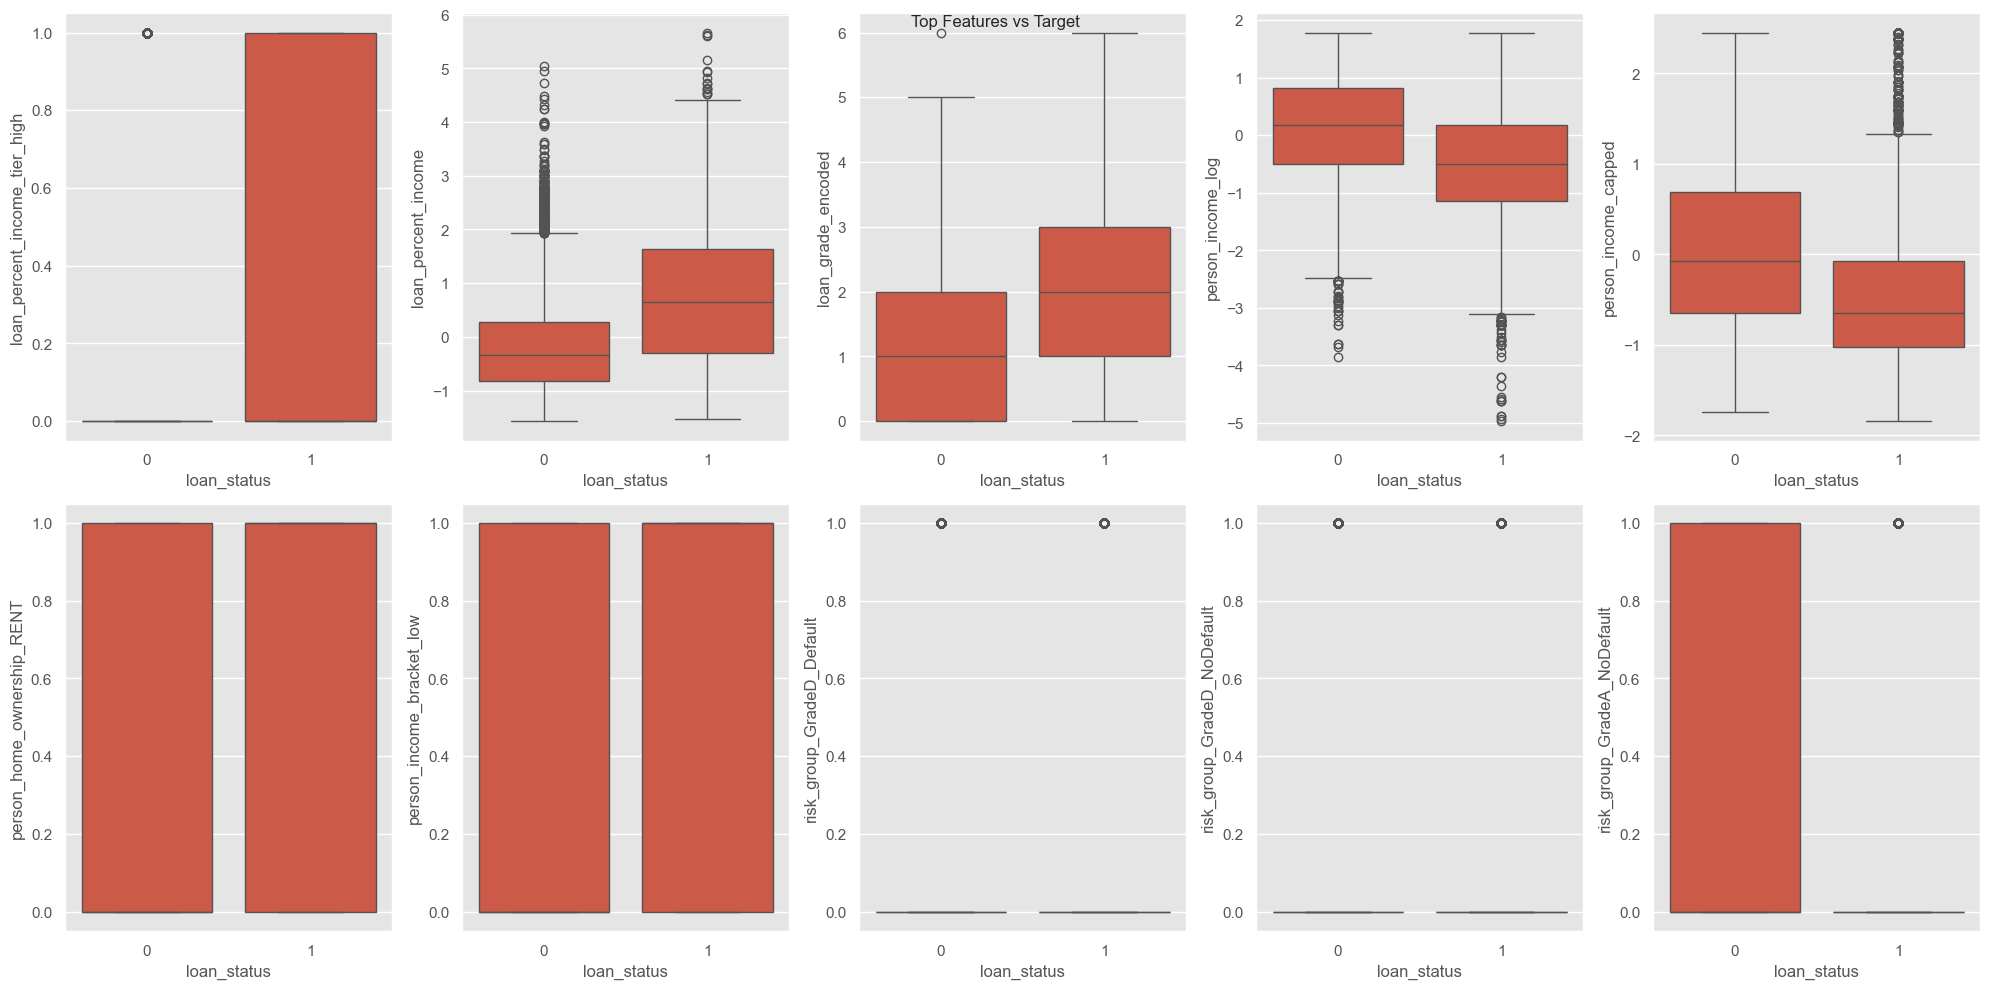


DATA QUALITY ASSESSMENT SUMMARY

1. Basic Structure:
 - Features: 22590 rows, 65 columns
 - Targets: 22590 rows, 2 columns

2. Missing Values:
 - Features: 0 missing values
 - Targets: 0 missing values

3. Constant Features:
 - Fully constant: 0
 - Near-constant (>99% same value): 0

4. Data Types:
 - Numeric features: 65
 - Categorical features: 0

5. Correlation Extremes:
 - Maximum correlation: 0.95
 - Minimum correlation: 0.00

6. Recommendations:
 - Remove near-constant features to improve model performance
 - Address feature skewness through transformation
 - Investigate highly correlated features for potential removal
 - Consider feature selection based on target correlations


In [15]:
# # Data Quality Assessment Notebook
# 
# This script performs comprehensive data quality checks on feature-engineered data.

# ## 1. Setup and Data Loading

# In[1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Define file paths
FEATURES_PATH = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\processed_features.csv"
TARGETS_PATH = r"C:\Users\Ken Ira Talingting\Desktop\multi-task-default-interest-model\data\feature-engineer\targets.csv"

# Load datasets
try:
    features_df = pd.read_csv(FEATURES_PATH)
    targets_df = pd.read_csv(TARGETS_PATH)
    print("Data loaded successfully")
    print(f"Features shape: {features_df.shape}")
    print(f"Targets shape: {targets_df.shape}")
except FileNotFoundError as e:
    print(f"File not found error: {e}")
    raise

# ## 2. Basic Data Structure Analysis

# In[2]:
def basic_structure_analysis(df, name="DataFrame"):
    """Print basic structural information about a DataFrame"""
    print(f"\n{name} Structure Analysis:")
    print("-" * 40)
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumn types distribution:")
    print(df.dtypes.value_counts())
    print("\nFirst 2 rows:")
    return df.head(2)

# Display basic structure
basic_structure_analysis(features_df, "Features")
basic_structure_analysis(targets_df, "Targets")


# ## 3. Missing Values Analysis

# In[3]:
def missing_values_analysis(df, name="DataFrame"):
    """Analyze and display missing values in a DataFrame"""
    total_missing = df.isnull().sum().sum()
    if total_missing == 0:
        print(f"\n{name}: No missing values detected")
        return
    
    print(f"\n{name} Missing Values Analysis:")
    print("-" * 40)
    missing_cols = df.columns[df.isnull().any()]
    for col in missing_cols:
        missing_count = df[col].isnull().sum()
        print(f"{col}: {missing_count} missing values ({missing_count/len(df):.2%})")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"{name} Missing Values Heatmap")
    plt.show()

missing_values_analysis(features_df, "Features")
missing_values_analysis(targets_df, "Targets")


# ## 4. Constant/Near-Constant Features Detection

# In[4]:
def constant_feature_analysis(df, threshold=0.99):
    """Detect constant/near-constant columns in a DataFrame"""
    constant_cols = []
    near_constant_cols = []
    
    print("\nConstant/Near-Constant Feature Analysis:")
    print("-" * 40)
    
    for col in df.columns:
        value_counts = df[col].value_counts(normalize=True)
        if len(value_counts) == 1:
            constant_cols.append(col)
        elif value_counts.iloc[0] > threshold:
            near_constant_cols.append((col, value_counts.index[0], value_counts.iloc[0]))
    
    if constant_cols:
        print(f"Found {len(constant_cols)} constant features:")
        for col in constant_cols[:5]:
            print(f" - {col}: {df[col].iloc[0]} (all values)")
        if len(constant_cols) > 5:
            print(f"...and {len(constant_cols)-5} more")
    
    if near_constant_cols:
        print(f"\nFound {len(near_constant_cols)} near-constant features (>{threshold*100}% same value):")
        for col, value, ratio in near_constant_cols[:5]:
            print(f" - {col}: {value} ({ratio:.2%} of values)")
        if len(near_constant_cols) > 5:
            print(f"...and {len(near_constant_cols)-5} more")
    
    return constant_cols, near_constant_cols

constant_cols, near_constant_cols = constant_feature_analysis(features_df)


# ## 5. Data Type and Distribution Analysis

# In[5]:
def distribution_analysis(df):
    """Analyze data distribution of numeric and categorical features"""
    numeric_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    
    print("\nNumeric Features Distribution:")
    print("-" * 40)
    print(f"Found {len(numeric_cols)} numeric features")
    
    # Skewness analysis
    skewness = df[numeric_cols].apply(skew).sort_values(ascending=False)
    print("\nTop 10 Most Skewed Features:")
    print(skewness.head(10))
    
    # Distribution visualization
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols[:4]):  # First 4 numeric features
        plt.subplot(2, 2, i+1)
        sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.suptitle('Numeric Features Distribution')
    plt.show()
    
    print(f"\nCategorical Features ({len(cat_cols)} total):")
    print("-" * 40)
    for col in cat_cols[:5]:  # First 5 categorical features
        print(f"\n{col} unique values ({df[col].nunique()} total):")
        print(df[col].value_counts(dropna=False).head().to_string())
    
    return numeric_cols, cat_cols

numeric_cols, cat_cols = distribution_analysis(features_df)


# ## 6. Correlation Analysis

# In[6]:
def correlation_analysis(df, numeric_cols):
    """Analyze feature correlations"""
    if len(numeric_cols) < 2:
        print("\nNot enough numeric features for correlation analysis")
        return
    
    print("\nFeature Correlation Analysis:")
    print("-" * 40)
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Display top correlated features
    top_corr = (corr_matrix.abs()
                .unstack()
                .sort_values(ascending=False)
                .drop_duplicates()
                .reset_index())
    top_corr.columns = ['Feature1', 'Feature2', 'Correlation']
    print("\nTop 10 Feature Correlations:")
    print(top_corr[(top_corr['Feature1'] != top_corr['Feature2']) & 
                   (top_corr['Correlation'] < 1.0)].head(10))
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
    plt.title('Feature Correlation Matrix')
    plt.show()

correlation_analysis(features_df, numeric_cols)


# ## 7. Target Analysis

# In[7]:
def target_analysis(features_df, targets_df):
    """Analyze relationships between features and targets"""
    print("\nTarget Analysis:")
    print("-" * 40)
    
    # Check if targets are classification or regression
    target_col = targets_df.columns[0]
    
    # Handle both binary classification and regression
    if targets_df[target_col].nunique() <= 20:  # Assume classification
        print("Binary classification task detected")
        print(f"\nClass distribution for {target_col}:")
        print(targets_df[target_col].value_counts(normalize=True).to_string())
        
        # Point-biserial correlation
        corr_results = {}
        for col in features_df.select_dtypes(include=np.number).columns:
            try:
                corr, pval = pointbiserialr(targets_df[target_col], features_df[col])
                corr_results[col] = (corr, pval)
            except:
                continue
                
        corr_df = pd.DataFrame(corr_results, index=['Correlation', 'P-value']).T
        top_corr = corr_df['Correlation'].abs().sort_values(ascending=False).head(10)
        
        print("\nTop 10 Features Correlated with Target:")
        print(top_corr)
        
        # Visualization
        top_features = top_corr.index
        fig, axes = plt.subplots(2, 5, figsize=(20, 10))
        for i, (ax, feature) in enumerate(zip(axes.flat, top_features)):
            sns.boxplot(x=targets_df[target_col], y=features_df[feature], ax=ax)
        plt.tight_layout()
        plt.suptitle('Top Features vs Target')
        plt.show()
    else:
        print("Regression task detected")
        # TODO: Add regression-specific analysis

if not targets_df.empty:
    target_analysis(features_df, targets_df)


# ## 8. Final Summary Report

# In[8]:
def generate_final_report():
    """Generate a comprehensive summary of all analyses"""
    print("\n" + "="*50)
    print("DATA QUALITY ASSESSMENT SUMMARY")
    print("="*50 + "\n")
    
    print("1. Basic Structure:")
    print(f" - Features: {features_df.shape[0]} rows, {features_df.shape[1]} columns")
    print(f" - Targets: {targets_df.shape[0]} rows, {targets_df.shape[1]} columns")
    
    print("\n2. Missing Values:")
    total_missing_features = features_df.isnull().sum().sum()
    total_missing_targets = targets_df.isnull().sum().sum()
    print(f" - Features: {total_missing_features} missing values")
    print(f" - Targets: {total_missing_targets} missing values")
    
    print("\n3. Constant Features:")
    print(f" - Fully constant: {len(constant_cols)}")
    print(f" - Near-constant (>99% same value): {len(near_constant_cols)}")
    
    print("\n4. Data Types:")
    print(f" - Numeric features: {len(numeric_cols)}")
    print(f" - Categorical features: {len(cat_cols)}")
    
    print("\n5. Correlation Extremes:")
    if len(numeric_cols) >= 2:
        top_corr = (features_df[numeric_cols].corr().abs()
                    .unstack()
                    .sort_values(ascending=False)
                    .drop_duplicates())
        print(f" - Maximum correlation: {top_corr.iloc[1]:.2f}")
        print(f" - Minimum correlation: {top_corr.iloc[-1]:.2f}")
    
    print("\n6. Recommendations:")
    print(" - Remove near-constant features to improve model performance")
    print(" - Address feature skewness through transformation")
    print(" - Investigate highly correlated features for potential removal")
    print(" - Consider feature selection based on target correlations")

generate_final_report()